In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
data = np.random.chisquare(2, 1000000000)
print(data)

[0.92247047 2.18473071 1.20233533 ... 2.07201341 3.53955772 1.07578775]


In [3]:
def lap_noise(data, epsilon, N):
    pri_data = data + np.random.laplace(loc = 0.0, scale = (16*N*(N*N+6*N+4)/((N+18)*(N*N+8*N-4)))/epsilon, size=data.shape)
    
    min = 10000
    
    for i in range(1000000000):
        if pri_data[i] > 0 and pri_data[i] < min:
            min = pri_data[i]
    
    for i in range(1000000000):
        if pri_data[i] < 0:
            pri_data[i] = min
    
    return pri_data

In [4]:
def precision(tp,fp):
    return tp/(tp+fp)

def recall(tp,fn):
    return tp/(tp+fn)

def f(tp,fp,fn):
    pre = precision(tp,fp)
    rec = recall(tp,fn)
    return 2*pre*rec/(pre+rec)

In [5]:
pri_data = lap_noise(data, 10, 100000)
print(pri_data)

[6.14560200e-01 2.21107140e+00 2.07672031e+00 ... 6.11041994e+00
 2.26685596e+00 6.73457690e-09]


In [6]:
sig = 0

si = 0
sigi = np.zeros(100000)

for i in range(1000000000):
    if data[i] >= 33.6:
        sig += 1
    if pri_data[i] >= 24:
        sigi[si] = i
        si += 1

print(sig)

52


In [7]:
tp = np.zeros(200)
fp = np.zeros(200)
fn = np.zeros(200)

th = np.zeros(200)

for i in range(200):
    th[i] = 24 + i*0.1


for i in range(si):
    for j in range(200):
        if pri_data[int(sigi[i])] > th[j]:
            if data[int(sigi[i])] > 33.6:
                tp[j] += 1
            else:
                fp[j] += 1
        else:
            break

for j in range(200):
    fn[j] = sig - tp[j]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.5693430656934307 34.6


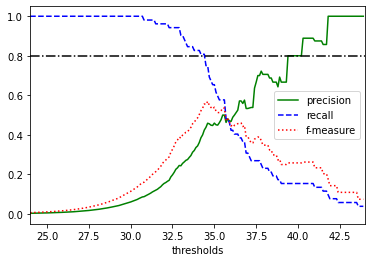

In [8]:
pre = np.zeros(200)
rec = np.zeros(200)
fme = np.zeros(200)

max = 0
maxi = 0

for i in range(200):
    pre[i] = precision(tp[i], fp[i])
    rec[i] = recall(tp[i], fn[i])
    fme[i] = f(tp[i],fp[i],fn[i])
    if fme[i] > max:
        max = fme[i]
        maxi = i

print(max, 24 + maxi*0.1)

fig = plt.figure()
plt.ylim(-0.05,1.05)
plt.xlim(24,44)
plt.plot(th, pre, marker="", color = "green", linestyle = "-", label = "precision")
plt.plot(th, rec, marker="", color = "blue", linestyle = "--", label = "recall")
plt.plot(th, fme, marker="", color = "red", linestyle = "dotted", label = "f-measure")
plt.axhline(0.8, color = "black", linestyle = "-.")
plt.legend()
plt.xlabel("thresholds")
plt.ylabel("")
fig.savefig("thresholds_CA_chi^2_epsilon=10.png")
fig.savefig("fig/thresholds_CA_chi^2_epsilon=10.eps")

In [9]:
pri_data = lap_noise(data, 7, 100000)
print(pri_data)

[4.78841563e+00 2.18697616e+00 1.63384072e-08 ... 2.28291523e+00
 4.01035450e+00 1.63384072e-08]


In [10]:
sig = 0

si = 0
sigi = np.zeros(100000)

for i in range(1000000000):
    if data[i] >= 33.6:
        sig += 1
    if pri_data[i] >= 24:
        sigi[si] = i
        si += 1

print(sig)

52


In [11]:
tp = np.zeros(200)
fp = np.zeros(200)
fn = np.zeros(200)

th = np.zeros(200)

for i in range(200):
    th[i] = 24 + i*0.1


for i in range(si):
    for j in range(200):
        if pri_data[int(sigi[i])] > th[j]:
            if data[int(sigi[i])] > 33.6:
                tp[j] += 1
            else:
                fp[j] += 1
        else:
            break

for j in range(200):
    fn[j] = sig - tp[j]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.1386138613861386 40.7


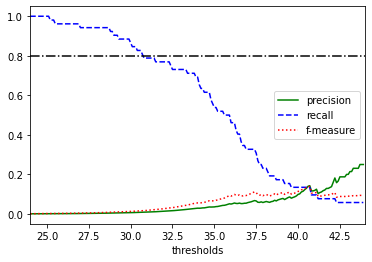

In [12]:
pre = np.zeros(200)
rec = np.zeros(200)
fme = np.zeros(200)

max = 0
maxi = 0

for i in range(200):
    pre[i] = precision(tp[i], fp[i])
    rec[i] = recall(tp[i], fn[i])
    fme[i] = f(tp[i],fp[i],fn[i])
    if fme[i] > max:
        max = fme[i]
        maxi = i

print(max, 24 + maxi*0.1)

fig = plt.figure()
plt.ylim(-0.05,1.05)
plt.xlim(24,44)
plt.plot(th, pre, marker="", color = "green", linestyle = "-", label = "precision")
plt.plot(th, rec, marker="", color = "blue", linestyle = "--", label = "recall")
plt.plot(th, fme, marker="", color = "red", linestyle = "dotted", label = "f-measure")
plt.axhline(0.8, color = "black", linestyle = "-.")
plt.legend()
plt.xlabel("thresholds")
plt.ylabel("")
fig.savefig("thresholds_CA_chi^2_epsilon=7.png")
fig.savefig("fig/thresholds_CA_chi^2_epsilon=7.eps")